In [1]:
import numpy as np
from brian2 import *

In [172]:
rates=np.load('rates_for_poisson.npy')+3
pcs=np.load('pcs.npy')
for_pca=np.load('for_pca.npy',allow_pickle=True)

In [4]:
print(pcs.shape)

(247, 806)


In [221]:
defaultclock.dt = 0.1*ms
spikes_gen=PoissonGroup(806,rates=rates[0]*Hz)
Minput = SpikeMonitor(spikes_gen)
duration=len(for_pca[0][0])*10*ms
run(duration)

WARNING    "rates" is an internal variable of group "poissongroup_3", but also exists in the run namespace with the value array([[ 3.        ,  3.4       ,  3.8       , ...,  7.        ,
        69.4       ,  5.        ],
       [ 3.        ,  3.        ,  6.0075188 , ...,  3.18796992,
        56.0075188 ,  3.93984962],
       [ 3.        ,  3.        ,  5.48667851, ...,  3.17761989,
        35.5044405 ,  3.17761989],
       ...,
       [ 3.39215686,  3.        ,  5.35294118, ...,  4.56862745,
        55.94117647,  3.98039216],
       [ 3.        ,  3.        ,  5.09205021, ...,  4.88284519,
        68.89958159,  3.41841004],
       [ 3.39138943,  3.        ,  5.34833659, ...,  3.19569472,
        68.94911937,  3.58708415]]). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


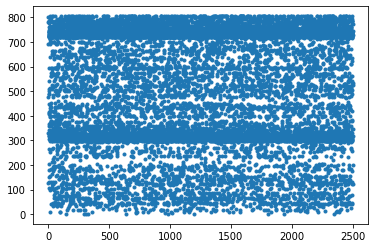

In [146]:
plot(Minput.t/ms, Minput.i, '.')

In [177]:
def simulate_poisson(rt,duration):
    defaultclock.dt = 0.1*ms
    spikes_gen=PoissonGroup(806,rates=rt*Hz)
    Minput = SpikeMonitor(spikes_gen)
    duration=len(for_pca[0][0])*10*ms
    net=Network(spikes_gen,Minput)
    net.run(duration)
    return Minput.t, Minput.i
    

In [178]:
def simulate_all_poisson(rts,for_pca):
    t_lst=[]
    i_lst=[]
    for j in range(0,247):
        print(j)
        t,i=simulate_poisson(rts[j],len(for_pca[j][0]))
        t_lst.append(np.array(t)*1000)
        i_lst.append(np.array(i))
    return t_lst, i_lst

In [179]:
t_lst,i_lst=simulate_all_poisson(rates,for_pca)

WARNING    "rates" is an internal variable of group "poissongroup_2", but also exists in the run namespace with the value array([[ 3.        ,  3.4       ,  3.8       , ...,  7.        ,
        69.4       ,  5.        ],
       [ 3.        ,  3.        ,  6.0075188 , ...,  3.18796992,
        56.0075188 ,  3.93984962],
       [ 3.        ,  3.        ,  5.48667851, ...,  3.17761989,
        35.5044405 ,  3.17761989],
       ...,
       [ 3.39215686,  3.        ,  5.35294118, ...,  4.56862745,
        55.94117647,  3.98039216],
       [ 3.        ,  3.        ,  5.09205021, ...,  4.88284519,
        68.89958159,  3.41841004],
       [ 3.39138943,  3.        ,  5.34833659, ...,  3.19569472,
        68.94911937,  3.58708415]]). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246


In [241]:
def bin_spikes(spike_times,spike_clusters, bin_size = 10):

    # Using clusters._phy_annotation.npy obtain valid clusters (i.e. >= 2)
    # valid_clusters_idx = np.array(np.where(clusters_annotation>=2))[0]

    spike_time_cells = np.empty(806, dtype=object) # Initalise empty object
    sps=0
    if len(np.unique(spike_clusters))!=806:
        sps=(806-len(np.unique(spike_clusters)))
    for i in np.arange(len(np.unique(spike_clusters))+sps):
        spike_time_cells[i] = spike_times[(np.where(spike_clusters == i)[0])]
        if type(spike_time_cells[i])==np.ndarray:
            continue
        else:
            spike_time_cells[i]=[]
    
    # Bin spike times into 10ms intervals
    spike_time_binned = np.empty(len(np.unique(spike_clusters))+sps, dtype=object) # Initalise empty object

    for cell_num in np.arange(len(spike_time_cells)):
        if len(spike_time_cells[cell_num])==0:
            spike_time_binned[cell_num]=np.array([0]*10000)
        else:
            spike_time_hist = np.histogram(spike_time_cells[cell_num],bins = np.arange(0,np.floor(spike_time_cells[cell_num][-1]),bin_size))
            spike_time_binned[cell_num] = spike_time_hist[0]

    # Spike_time_binned returns binned spikes sorted into cells
    # Spike_time_cells returns UNbinned spikes sorted into cells
    # cell_spikes_max returns a single cell index that has the max number of spikes (i.e most active cell)
    return spike_time_binned

In [204]:
rates.shape

(247, 806)

In [239]:
def bin_spikes_all(t_lst,i_lst):
    for_pca_poisson=[]
    for j in range(0,247):
        spike_time_binned=bin_spikes(t_lst[j],i_lst[j])
        lst=[]
        for neuron in range(0,len(spike_time_binned)):
            lst.append(spike_time_binned[neuron].shape[0])
        mn=min(lst)
        if mn==0:
            print(j)
        spike_tm=[]
        for neuron in range(0,len(spike_time_binned)):
            spike_tm.append(spike_time_binned[neuron][:mn])
        for_pca_poisson.append(spike_tm)
    return for_pca_poisson

In [242]:
for_pca_poisson=bin_spikes_all(t_lst,i_lst)

61
147


In [245]:
def conduct_pca_get_features(for_pca):
    from sklearn.decomposition import PCA
    
    pcs=[]
    for trial in range(0,247):
        if trial!=61 and trial!=147:
            print(trial)
            pca=PCA(n_components=1)
            pc=pca.fit_transform(np.array(for_pca[trial]))
            pcs.append(pc.flatten())
    pcs=np.array(pcs)
    return pcs

In [246]:
pcs_poisson=conduct_pca_get_features(for_pca_poisson)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246


In [247]:
np.save('pcs_poisson.npy',pcs_poisson)